# Pipeline Test Harness


In [1]:
from welfareobs.utils.performance_monitor import PerformanceMonitor
from welfareobs.runner import Runner
from welfareobs.utils.config import Config
import matplotlib.pyplot as plt


cfg: Config = Config(
    "/project/config/non-rtsp-example.json",
    "/project/welfareobs/welfareobs"
)

runner: Runner = Runner(cfg)
runner.run(100) # this matches the performance-history-size configuration



INFO:datasets:PyTorch version 2.7.0 available.


Calling setup
camera-1 calling setup
found 21845 files
detection-1 calling setup


INFO:timm.models._builder:Loading pretrained weights from Hugging Face hub (BVRA/wildlife-mega-L-384)
INFO:detectron2.checkpoint.detection_checkpoint:[DetectionCheckpointer] Loading from /project/data/detectron2_models/mask_rcnn_R_101_FPN_3x/model_final_a3ec72.pkl ...
INFO:fvcore.common.checkpoint:[Checkpointer] Loading from /project/data/detectron2_models/mask_rcnn_R_101_FPN_3x/model_final_a3ec72.pkl ...
INFO:fvcore.common.checkpoint:Reading a file from 'Detectron2 Model Zoo'


location-1 calling setup
aggregator calling setup
local-save calling setup
step-1: run=1 time=0.00027680397033691406 avg=0.0 sd=0


/usr/local/lib/python3.13/dist-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4314.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


step-2: run=1 time=8.98100233078003 avg=8.981 sd=0
step-3: run=1 time=0.00024008750915527344 avg=0.0 sd=0
step-4: run=1 time=0.0001251697540283203 avg=0.0 sd=0
step-7: run=1 time=0.030811786651611328 avg=0.031 sd=0
step-1: run=2 time=0.0001010894775390625 avg=0.0 sd=0.0
step-2: run=2 time=8.7371506690979 avg=8.859 sd=0.172
step-3: run=2 time=0.0005507469177246094 avg=0.0 sd=0.0
step-4: run=2 time=0.0001266002655029297 avg=0.0 sd=0.0
step-7: run=2 time=0.025664329528808594 avg=0.028 sd=0.004
step-1: run=3 time=0.00011444091796875 avg=0.0 sd=0.0
step-2: run=3 time=8.526763677597046 avg=8.748 sd=0.227
step-3: run=3 time=0.0002846717834472656 avg=0.0 sd=0.0
step-4: run=3 time=0.00042247772216796875 avg=0.0 sd=0.0
step-7: run=3 time=0.020511150360107422 avg=0.026 sd=0.005
step-1: run=4 time=0.0001888275146484375 avg=0.0 sd=0.0
step-2: run=4 time=8.351611614227295 avg=8.649 sd=0.272
step-3: run=4 time=0.00030994415283203125 avg=0.0 sd=0.0
step-4: run=4 time=0.00011730194091796875 avg=0.0 sd=

TypeError: 'float' object is not callable

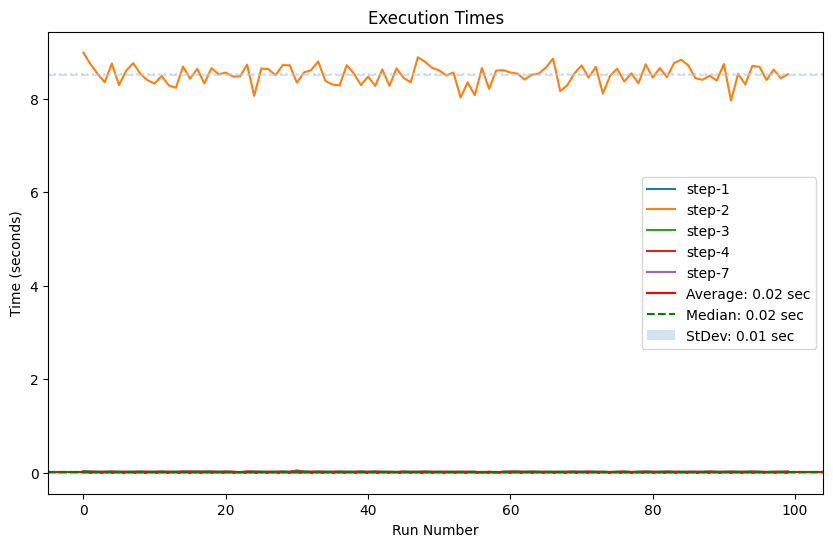

In [7]:
perf: PerformanceMonitor = runner.performance
step_perfs: list[PerformanceMonitor] = []
for i in range(runner.len_steps()):
    step_perfs.append(runner.get_step(i).performance)

execution_times = list(perf)

# Calculate statistics
avg_time = perf.average
median_time = perf.median
stdev_time = perf.stdev

# Create the plot
plt.figure(figsize=(10, 6))
for i, perf in enumerate(step_perfs):
    execution_times = list(perf)
    avg_time = perf.average
    median_time = perf.median
    stdev_time = perf.stdev

    plt.plot(execution_times, label=f'{perf.label}')
    plt.axhline(y=avg_time, color=plt.cm.tab20(i), linestyle='--', alpha=0.5)
    plt.axhline(y=median_time, color=plt.cm.tab20(i), linestyle=':', alpha=0.5)

plt.plot(execution_times)
plt.axhline(y=avg_time, color='r', linestyle='-', label=f'Average: {avg_time:.2f} sec')
plt.axhline(y=median_time, color='g', linestyle='--', label=f'Median: {median_time:.2f} sec')
plt.fill_between(range(len(execution_times)), [t - stdev_time for t in execution_times], [t + stdev_time for t in execution_times], alpha=0.2, label=f'StDev: {stdev_time:.2f} sec')
plt.title('Execution Times')
plt.xlabel('Run Number')
plt.ylabel('Time (seconds)')
plt.yscale('linear')
plt.legend()
plt.show()

